# Long DBS scans

### Introduction:

One possible way to retrieve winds using wind lidar is using the Doppler beam swing (DBS) scanning strategy. The DBS consists of four slanted observations of the wind. Each one of the observations is from a different azimuth, equally separated by 90 degrees (0, 90, 180, 270). While executing the DBS, the lidar first observes the wind at azimuths of 0 and 180 degrees and then at 90 and 270 degrees. From those observations, the north-south and east-west wind components can be calculated directly.

This example focuses on using lidarwind to retrieve wind speed and direction profiles from the observations collected by the WindCube using the DBS scan strategy. This example is structurally similar to dbs_scans. The only difference is the input data. Instead of individual files for each complete DBS scan, each file contains several complete DBS scans.

### Steps:

1) Downloading sample data from zenodo
1) Reading the DBS files
2) Merging the DBS files
3) Retrieving the wind profiles 
4) Visualising the profiles

In [1]:
import matplotlib.pyplot as plt
import lidarwind
from lidarwind.utilities import sample_data

### Step 0: Downloading the sample data

In [2]:
file_list = sample_data("wc_long_dbs")

### Step 1 and 2: Reading and merging the long DBS files

Here we are going to read all the DBS files. Be careful to provide a list of files that are compatible with each other. Here we also indicate the variables required for processing the DBS fils. Finally, the merged dataset is created. 

In [3]:
var_list = ['azimuth', 'elevation', 'radial_wind_speed', 
            'radial_wind_speed_status', 'measurement_height', 'cnr']

merged_ds = lidarwind.DbsOperations(file_list, var_list).merged_ds

### Step 3: Wind profile retrievals

Once the merged dataset is created, you can use the dedicated class to retrieve the wind profiles. 

In [4]:
wind_obj = lidarwind.GetWindProperties5Beam(merged_ds)

As indicated below, you can read the wind profiles directly from the wind_obj (wind object). Since they have different timestamps, it is helpful to resample the data into a regular time grid.

In [5]:
hor_wind_speed = lidarwind.GetResampledData(wind_obj.hor_wind_speed, time_freq='20s', tolerance=10)
ver_wind_speed = lidarwind.GetResampledData(wind_obj.ver_wind_speed, time_freq='20s', tolerance=10)
hor_wind_dir = lidarwind.GetResampledData(wind_obj.hor_wind_dir, time_freq='20s', tolerance=10)

### Step 4: Visualising the profiles

After resampling, you can use the xarray methods to plot the data. 

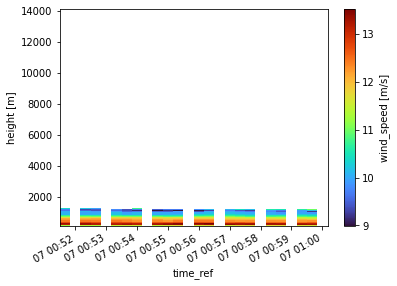

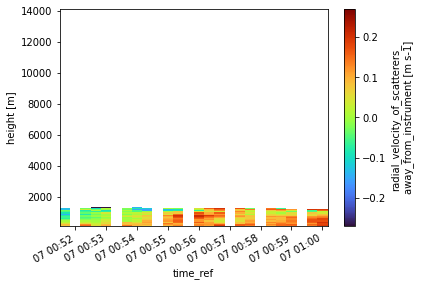

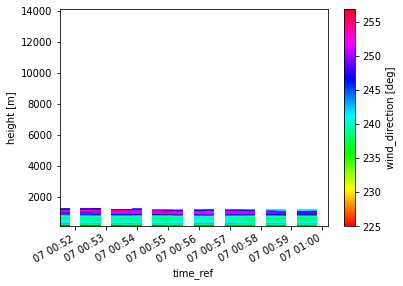

In [6]:
t1 = merged_ds.time.values[0]
t2 = merged_ds.time.values[-1]

hor_wind_speed.resampled.sel(time_ref=slice(t1,t2)).plot(y='range', cmap='turbo')
plt.show()

ver_wind_speed.resampled.sel(time_ref=slice(t1,t2)).plot(y='range', cmap='turbo')
plt.show()

hor_wind_dir.resampled.sel(time_ref=slice(t1,t2)).plot(y='range', cmap='hsv')
plt.show()